In [1]:
from bolt.spark.chunk import ChunkedArray
from bolt.utils import slicify, tupleize
from PIL import Image as Pmg
import numpy as np
from pyqae.nd import DiskMappedLazyImage

In [2]:
tupleize((None))

In [3]:
test_ds = DiskMappedLazyImage('/Volumes/ExDisk/cor03639_CH2.tif')
lil_ds = DiskMappedLazyImage('/Volumes/ExDisk/train_sm/set4_1.jpeg')
lil_rdd = sc.parallelize([((0,), lil_ds)])

In [4]:
lil_ds[0:10, 0:20:2].shape

(10, 10, 3)

```
ch_img._shape, ch_img._split, ch_img._dtype, ch_img._plan, ch_img._padding, ch_img._ordered
```
Results from last size
```python
((350, 2329, 3099, 3),
 1,
 dtype('uint8'),
 array([100, 100,   3]),
 array([20, 20,  0]),
 None)
```

In [17]:
lil_ds.size

(3099, 2329, 3)

In [18]:
def chunky_image(in_ds, context = sc, tile_size = (256, 256), padding = (0,0) ):
    in_rdd = sc.parallelize([((0,), in_ds)])
    return ChunkedArray(in_rdd, 
                  shape = (in_rdd.count(),)+in_ds.size, 
                  split = 1, 
                  dtype = in_ds[0,0].dtype
                 )._chunk(size = tile_size, axis = None, padding = padding)

In [19]:
bchi_bolt = chunky_image(test_ds)

/Users/mader/anaconda/lib/python3.5/site-packages/PIL/Image.py:2246: DecompressionBombWarning: Image size (687540942 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning)


In [8]:
from pyqae.simplespark import LocalSparkContext
lsc = LocalSparkContext()

In [9]:
lil_ds[0,0].dtype

dtype('uint8')

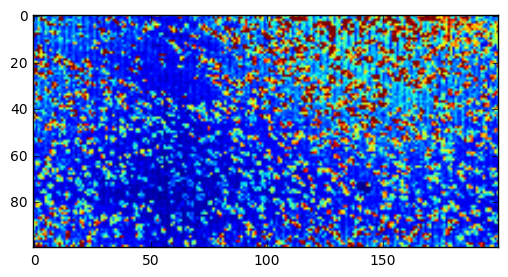

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(bchi_bolt.unchunk()[0,15000:16000:10,10000:12000:10].toarray())

3099

In [23]:
bchi_bolt

Chunked BoltArray
shape: (1, 22902, 30021)
chunk size: (256, 256)
padding: none

In [22]:
bchi_bolt.tordd().first()[1].shape

(256, 256)